In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

#import category_encoders as ce

pd.set_option('display.max_columns', None)

In [4]:
dfcrash = pd.read_csv('2019_DATA_SA_Crash.csv')

In [5]:
dfcrash.shape

(12964, 33)

In [6]:
dfunit = pd.read_csv('2019_DATA_SA_Units.csv')

In [ ]:
dfunit.shape

In [9]:
dfunit.head()

,REPORT_ID,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Postcode,Rollover,Fire
0,2019-1-8/07/2020,1,0,SA,Station Wagon,1998,South,Female,085,SA,C,Full,Not Towing,Right Turn,1.0,XXXX,NaN,NaN
1,2019-1-8/07/2020,2,0,SA,Motor Cars - Sedan,2009,East,Female,022,SA,C,Provisional 2,Not Towing,Straight Ahead,1.0,5085,NaN,NaN
2,2019-2-8/07/2020,1,0,SA,Motor Cars - Sedan,2007,North East,Male,021,SA,C,Provisional 2,Not Towing,Straight Ahead,4.0,5114,NaN,NaN
3,2019-2-8/07/2020,2,0,SA,Motor Cars - Sedan,2002,North East,Female,031,SA,C,Full,Not Towing,Straight Ahead,1.0,5108,NaN,NaN
4,2019-3-8/07/2020,1,0,UNKNOWN,Motor Vehicle - Type Unknown,XXXX,East,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Straight Ahead,1.0,XXXX,NaN,NaN


In [10]:
unit1 = dfunit[dfunit['Unit No'] == 1]

In [11]:
unit1

,REPORT_ID,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Postcode,Rollover,Fire
0,2019-1-8/07/2020,1,0,SA,Station Wagon,1998,South,Female,085,SA,C,Full,Not Towing,Right Turn,1.0,XXXX,NaN,NaN
2,2019-2-8/07/2020,1,0,SA,Motor Cars - Sedan,2007,North East,Male,021,SA,C,Provisional 2,Not Towing,Straight Ahead,4.0,5114,NaN,NaN
4,2019-3-8/07/2020,1,0,UNKNOWN,Motor Vehicle - Type Unknown,XXXX,East,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Straight Ahead,1.0,XXXX,NaN,NaN
6,2019-4-8/07/2020,1,1,SA,Motor Cycle,2015,North West,Male,021,SA,C RD,Learners,Not Towing,Straight Ahead,1.0,5108,NaN,NaN
8,2019-5-8/07/2020,1,0,SA,Motor Cars - Sedan,2017,West,Male,031,UNKNOWN,C,Full,Not Towing,Straight Ahead,1.0,XXXX,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27704,2019-12960-8/07/2020,1,1,SA,Station Wagon,2016,North,Male,059,SA,C,Full,Not Towing,Stopped on Carriageway,1.0,5074,NaN,NaN
27706,2019-12961-8/07/2020,1,0,SA,Motor Cars - Sedan,2004,North East,Male,038,SA,C,Provisional 1,Not Towing,Straight Ahead,3.0,5012,NaN,NaN
27708,2019-12962-8/07/2020,1,1,NaN,Pedal Cycle,NaN,North East,Male,047,NaN,NaN,NaN,NaN,Straight Ahead,1.0,5290,NaN,NaN
27710,2019-12963-8/07/2020,1,0,SA,Motor Cycle,2007,North West,Male,058,SA,R,Full,Not Towing,Straight Ahead,1.0,5241,NaN,NaN


In [12]:
df = pd.merge(dfcrash, unit1, how='left', on='REPORT_ID')

In [9]:
df.head()

,REPORT_ID,Stats Area,Suburb,Postcode_x,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Postcode_y,Rollover,Fire
0,2019-1-8/07/2020,2 Metropolitan,HAMPSTEAD GARDENS,5086,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,2019,June,Wednesday,11:15 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,1,Driver Rider,1: PDO,Give Way Sign,NaN,NaN,1331810.03,1676603.26,13318101676603,1,0,SA,Station Wagon,1998,South,Female,085,SA,C,Full,Not Towing,Right Turn,1.0,XXXX,NaN,NaN
1,2019-2-8/07/2020,2 Metropolitan,DRY CREEK,5094,CITY OF SALISBURY,2,0,0,0,0,2019,January,Tuesday,12:49 am,90,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Rear End,2,Driver Rider,1: PDO,No Control,NaN,NaN,1328376.20,1682942.63,13283761682943,1,0,SA,Motor Cars - Sedan,2007,North East,Male,021,SA,C,Provisional 2,Not Towing,Straight Ahead,4.0,5114,NaN,NaN
2,2019-3-8/07/2020,2 Metropolitan,MILE END,5031,CITY OF WEST TORRENS,2,1,0,0,1,2019,January,Tuesday,12:00 am,60,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,1,Driver Rider,2: MI,No Control,NaN,NaN,1325819.68,1670994.26,13258201670994,1,0,UNKNOWN,Motor Vehicle - Type Unknown,XXXX,East,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Straight Ahead,1.0,XXXX,NaN,NaN
3,2019-4-8/07/2020,2 Metropolitan,PARALOWIE,5108,CITY OF SALISBURY,2,1,0,1,0,2019,January,Tuesday,12:05 am,50,Not Divided,"CURVED, VIEW OPEN",Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Fixed Object,1,Driver Rider,3: SI,No Control,NaN,NaN,1328320.60,1690237.08,13283211690237,1,1,SA,Motor Cycle,2015,North West,Male,021,SA,C RD,Learners,Not Towing,Straight Ahead,1.0,5108,NaN,NaN
4,2019-5-8/07/2020,2 Metropolitan,MOUNT BARKER,5251,DC MT.BARKER.,2,0,0,0,0,2019,January,Tuesday,05:15 am,110,Divided Road,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Animal,2,Animal,1: PDO,No Control,NaN,NaN,1353279.99,1655645.15,13532801655645,1,0,SA,Motor Cars - Sedan,2017,West,Male,031,UNKNOWN,C,Full,Not Towing,Straight Ahead,1.0,XXXX,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12964 entries, 0 to 12963
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   REPORT_ID            12964 non-null  object 
 1   Stats Area           12964 non-null  object 
 2   Suburb               12964 non-null  object 
 3   Postcode_x           12964 non-null  int64  
 4   LGA Name             12857 non-null  object 
 5   Total Units          12964 non-null  int64  
 6   Total Cas            12964 non-null  int64  
 7   Total Fats           12964 non-null  int64  
 8   Total SI             12964 non-null  int64  
 9   Total MI             12964 non-null  int64  
 10  Year                 12964 non-null  int64  
 11  Month                12964 non-null  object 
 12  Day                  12964 non-null  object 
 13  Time                 12964 non-null  object 
 14  Area Speed           12964 non-null  int64  
 15  Position Type        12964 non-null 

In [11]:
df.isnull().sum()

REPORT_ID                  0
Stats Area                 0
Suburb                     0
Postcode_x                 0
LGA Name                 107
Total Units                0
Total Cas                  0
Total Fats                 0
Total SI                   0
Total MI                   0
Year                       0
Month                      0
Day                        0
Time                       0
Area Speed                 0
Position Type              0
Horizontal Align           0
Vertical Align             0
Other Feat                 0
Road Surface               0
Moisture Cond              0
Weather Cond               0
DayNight                   0
Crash Type                 0
Unit Resp                  0
Entity Code                0
CSEF Severity              0
Traffic Ctrls              0
DUI Involved           12615
Drugs Involved         12650
ACCLOC_X                   0
ACCLOC_Y                   0
UNIQUE_LOC                 0
Unit No                    0
No Of Cas     

## Data Cleaning

Which columns are easily identifiable to drop from the dataframe?

In [12]:
dropcols = ['Postcode_x', 'Postcode_y', 'Suburb', 'LGA Name', 'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC']
#These will have no bearing on the modelling process

In [13]:
df = df.drop(dropcols, axis=1)

In [14]:
df.columns

Index(['REPORT_ID', 'Stats Area', 'Total Units', 'Total Cas', 'Total Fats',
       'Total SI', 'Total MI', 'Year', 'Month', 'Day', 'Time', 'Area Speed',
       'Position Type', 'Horizontal Align', 'Vertical Align', 'Other Feat',
       'Road Surface', 'Moisture Cond', 'Weather Cond', 'DayNight',
       'Crash Type', 'Unit Resp', 'Entity Code', 'CSEF Severity',
       'Traffic Ctrls', 'DUI Involved', 'Drugs Involved', 'Unit No',
       'No Of Cas', 'Veh Reg State', 'Unit Type', 'Veh Year',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Class',
       'Licence Type', 'Towing', 'Unit Movement', 'Number Occupants',
       'Rollover', 'Fire'],
      dtype='object')

In [15]:
df.shape

(12964, 43)

The documentation shows that while rare, the fire, rollover, DUI and drugs involved values are confirmed - I will assume that the NaN values are the crashes where it didn't occur. I will replace Nan with confirmed values of no involvement of those factors. Confirmed incidents where those occurred will be encoded with 1.

In [16]:
df[['Fire', 'Rollover', 'DUI Involved', 'Drugs Involved']].notnull().sum()

Fire               20
Rollover          695
DUI Involved      349
Drugs Involved    314
dtype: int64

In [17]:
df['Fire'].value_counts()

Y    20
Name: Fire, dtype: int64

In [18]:
df['Rollover'].value_counts()

Y    695
Name: Rollover, dtype: int64

In [19]:
df['DUI Involved'].value_counts()

Y    349
Name: DUI Involved, dtype: int64

In [20]:
df['Drugs Involved'].value_counts()

Y    314
Name: Drugs Involved, dtype: int64

In [21]:
df['Fire'].replace('Y', 1, inplace=True)
df['Rollover'].replace('Y', 1, inplace=True)
df['DUI Involved'].replace('Y', 1, inplace=True)
df['Drugs Involved'].replace('Y', 1, inplace=True)

In [22]:
df['Fire'].value_counts()

1.0    20
Name: Fire, dtype: int64

In [23]:
df['Rollover'].value_counts()

1.0    695
Name: Rollover, dtype: int64

In [24]:
df['DUI Involved'].value_counts()

1.0    349
Name: DUI Involved, dtype: int64

In [25]:
df['Drugs Involved'].value_counts()

1.0    314
Name: Drugs Involved, dtype: int64

In [26]:
df[['Fire', 'Rollover', 'DUI Involved', 'Drugs Involved']].isna().sum()

Fire              12944
Rollover          12269
DUI Involved      12615
Drugs Involved    12650
dtype: int64

In [27]:
df['Fire'].fillna(0, inplace=True)

In [28]:
df[['Fire', 'Rollover', 'DUI Involved', 'Drugs Involved']].isna().sum()

Fire                  0
Rollover          12269
DUI Involved      12615
Drugs Involved    12650
dtype: int64

In [29]:
fillcols = ['Fire', 'Rollover', 'DUI Involved', 'Drugs Involved']
df[fillcols].isna().sum()

Fire                  0
Rollover          12269
DUI Involved      12615
Drugs Involved    12650
dtype: int64

In [30]:
df['Rollover'].fillna(0, inplace=True)
df['DUI Involved'].fillna(0, inplace=True)
df['Drugs Involved'].fillna(0, inplace=True)

In [31]:
df[fillcols].isna().sum()

Fire              0
Rollover          0
DUI Involved      0
Drugs Involved    0
dtype: int64

In [32]:
print(df['Fire'].value_counts())
print(df['Rollover'].value_counts())
print(df['DUI Involved'].value_counts())
print(df['Drugs Involved'].value_counts())

0.0    12944
1.0       20
Name: Fire, dtype: int64
0.0    12269
1.0      695
Name: Rollover, dtype: int64
0.0    12615
1.0      349
Name: DUI Involved, dtype: int64
0.0    12650
1.0      314
Name: Drugs Involved, dtype: int64


In [33]:
#Checking next column to clean null values
df.isnull().sum()

REPORT_ID                0
Stats Area               0
Total Units              0
Total Cas                0
Total Fats               0
Total SI                 0
Total MI                 0
Year                     0
Month                    0
Day                      0
Time                     0
Area Speed               0
Position Type            0
Horizontal Align         0
Vertical Align           0
Other Feat               0
Road Surface             0
Moisture Cond            0
Weather Cond             0
DayNight                 0
Crash Type               0
Unit Resp                0
Entity Code              0
CSEF Severity            0
Traffic Ctrls            0
DUI Involved             0
Drugs Involved           0
Unit No                  0
No Of Cas                0
Veh Reg State          406
Unit Type                4
Veh Year               406
Direction Of Travel      1
Sex                    343
Age                    343
Lic State              769
Licence Class          747
L

In [34]:
df['Veh Reg State'].value_counts()

SA         12121
VIC          202
NSW           61
QLD           51
UNKNOWN       48
WA            42
NT            17
FEDERAL        9
TAS            5
ACT            2
Name: Veh Reg State, dtype: int64

In [35]:
df['Veh Reg State'].isnull().sum()

406

I will make the assumption that the unknown vehicles are registered to SA.

In [36]:
df['Veh Reg State'].fillna('SA', inplace=True)

In [37]:
df['Veh Reg State'].isnull().sum()

0

In [38]:
df['Veh Reg State'].replace('UNKNOWN', 'SA', inplace=True)

In [39]:
df['Veh Reg State'].value_counts()

SA         12575
VIC          202
NSW           61
QLD           51
WA            42
NT            17
FEDERAL        9
TAS            5
ACT            2
Name: Veh Reg State, dtype: int64

Encoding the vehicle types into groups. Unknown vehicles will be defined as motor-cars sedan. 

In [40]:
df['Unit Type'].value_counts(normalize=False)

Motor Cars - Sedan                6743
Station Wagon                     2692
Utility                           1177
Motor Cycle                        520
RIGID TRUCK LGE GE 4.5T            414
Pedal Cycle                        299
Panel Van                          225
OMNIBUS                            200
SEMI TRAILER                       168
Other Defined Special Vehicle       91
Pedestrian on Road                  76
Taxi Cab                            73
BDOUBLE - ROAD TRAIN                66
Motor Vehicle - Type Unknown        60
Light Truck LT 4.5T                 45
Scooter                             42
Motor Cars - Tourer                 25
Forward Control Passenger Van       17
Pedestrian on Footpath/Carpark      14
Power Asst. Bicycle                  7
Small Wheel Vehicle User             2
Animal - Wild                        1
Tram                                 1
Animal Drawn Vehicle                 1
Motorised Wheelchair/Gopher          1
Name: Unit Type, dtype: i

In [41]:
df['Unit Type'].replace('Motor Vehicle - Type Unknown', 'Motor Cars - Sedan', inplace=True)

In [42]:
df['Unit Type'].value_counts(normalize=False)

Motor Cars - Sedan                6803
Station Wagon                     2692
Utility                           1177
Motor Cycle                        520
RIGID TRUCK LGE GE 4.5T            414
Pedal Cycle                        299
Panel Van                          225
OMNIBUS                            200
SEMI TRAILER                       168
Other Defined Special Vehicle       91
Pedestrian on Road                  76
Taxi Cab                            73
BDOUBLE - ROAD TRAIN                66
Light Truck LT 4.5T                 45
Scooter                             42
Motor Cars - Tourer                 25
Forward Control Passenger Van       17
Pedestrian on Footpath/Carpark      14
Power Asst. Bicycle                  7
Small Wheel Vehicle User             2
Animal Drawn Vehicle                 1
Animal - Wild                        1
Tram                                 1
Motorised Wheelchair/Gopher          1
Name: Unit Type, dtype: int64

In [43]:
df.loc[df['Unit Type'].isnull()]

,REPORT_ID,Stats Area,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
1988,2019-1989-8/07/2020,1 City,1,1,0,0,1,2019,March,Friday,05:25 pm,50,T-Junction,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Daylight,Roll Over,1,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,NaN,NaN,South East,Female,034,NaN,NaN,NaN,NaN,Straight Ahead,1.0,1.0,0.0
3160,2019-3161-8/07/2020,1 City,2,1,0,0,1,2019,March,Saturday,01:45 pm,50,T-Junction,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,1,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,NaN,NaN,West,Male,024,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0
5133,2019-5134-8/07/2020,1 City,2,0,0,0,0,2019,May,Friday,05:22 pm,50,T-Junction,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Right Angle,1,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,NaN,NaN,East,Female,021,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0
12028,2019-12029-8/07/2020,1 City,1,1,0,1,0,2019,September,Thursday,09:30 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Roll Over,1,Driver Rider,3: SI,No Control,0.0,0.0,1,1,SA,NaN,NaN,South,Male,045,NaN,NaN,NaN,NaN,Straight Ahead,1.0,1.0,0.0


2/4 of these crashes are rollovers - because of this I will assume those are cars and will further assume the other two are as well, due to the high proportion of cars.

In [44]:
df['Unit Type'].fillna('Motor Cars - Sedan', inplace=True)

In [45]:
#Passenger Vehicles
df['Unit Type'].replace(['Motor Cars - Sedan', 'Station Wagon', 'Utility', 'Taxi Cab', 'Motor Cars - Tourer'], 1, inplace=True)

In [46]:
df['Unit Type'].value_counts()

1                                 10774
Motor Cycle                         520
RIGID TRUCK LGE GE 4.5T             414
Pedal Cycle                         299
Panel Van                           225
OMNIBUS                             200
SEMI TRAILER                        168
Other Defined Special Vehicle        91
Pedestrian on Road                   76
BDOUBLE - ROAD TRAIN                 66
Light Truck LT 4.5T                  45
Scooter                              42
Forward Control Passenger Van        17
Pedestrian on Footpath/Carpark       14
Power Asst. Bicycle                   7
Small Wheel Vehicle User              2
Animal Drawn Vehicle                  1
Animal - Wild                         1
Motorised Wheelchair/Gopher           1
Tram                                  1
Name: Unit Type, dtype: int64

In [47]:
#Heavy Vehicles
df['Unit Type'].replace(['RIGID TRUCK LGE GE 4.5T', 'OMNIBUS', 'SEMI TRAILER', 'BDOUBLE - ROAD TRAIN'], 2, inplace=True)

In [48]:
#Medium Vehicles

df['Unit Type'].replace(['Panel Van', 'Forward Control Passenger Van', 'Light Truck LT 4.5T'], 3, inplace=True)

In [49]:
#Motorcycle

df['Unit Type'].replace(['Motor Cycle', 'Scooter'], 4, inplace=True)

In [50]:
#Light Vehicles

df['Unit Type'].replace(['Pedal Cycle', 'Power Asst. Bicycle', 'Small Wheel Vehicle User', 'Motorised Wheelchair/Gopher'], 5, inplace=True)

In [51]:
# Miscellaneous Vehicles

df['Unit Type'].replace(['Other Defined Special Vehicle', 'Tram', 'Animal Drawn Vehicle', 'Animal - Wild'], 6, inplace=True)

In [52]:
#Pedestrians

df['Unit Type'].replace(['Pedestrian on Road', 'Pedestrian on Footpath/Carpark'], 7, inplace=True)

In [53]:
df['Unit Type'].value_counts()

1    10774
2      848
4      562
5      309
3      287
6       94
7       90
Name: Unit Type, dtype: int64

In [54]:
df.isnull().sum()

REPORT_ID                0
Stats Area               0
Total Units              0
Total Cas                0
Total Fats               0
Total SI                 0
Total MI                 0
Year                     0
Month                    0
Day                      0
Time                     0
Area Speed               0
Position Type            0
Horizontal Align         0
Vertical Align           0
Other Feat               0
Road Surface             0
Moisture Cond            0
Weather Cond             0
DayNight                 0
Crash Type               0
Unit Resp                0
Entity Code              0
CSEF Severity            0
Traffic Ctrls            0
DUI Involved             0
Drugs Involved           0
Unit No                  0
No Of Cas                0
Veh Reg State            0
Unit Type                0
Veh Year               406
Direction Of Travel      1
Sex                    343
Age                    343
Lic State              769
Licence Class          747
L

In [55]:
df.loc[df['Veh Year'].isna()]

,REPORT_ID,Stats Area,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
8,2019-9-8/07/2020,3 Country,1,1,0,0,1,2019,January,Tuesday,11:45 am,50,T-Junction,Straight road,Bottom of Hill,Not Applicable,Sealed,Dry,Not Raining,Daylight,Roll Over,1,Driver Rider,2: MI,Stop Sign,0.0,0.0,1,1,SA,5,NaN,North East,Female,056,NaN,NaN,NaN,NaN,Straight Ahead,1.0,1.0,0.0
26,2019-27-8/07/2020,2 Metropolitan,2,1,0,0,1,2019,January,Tuesday,05:30 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Parked Vehicle,2,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,5,NaN,North,Male,016,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0
68,2019-69-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Friday,12:01 pm,50,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,1: PDO,Roundabout,0.0,0.0,1,0,SA,5,NaN,North,Male,039,NaN,NaN,NaN,NaN,Stopped on Carriageway,1.0,0.0,0.0
84,2019-85-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Tuesday,04:30 pm,50,T-Junction,"CURVED, VIEW OPEN",Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,5,NaN,West,Male,013,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0
89,2019-90-8/07/2020,1 City,2,2,0,0,2,2019,January,Saturday,08:50 am,50,Not Divided,"CURVED, VIEW OPEN",Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Side Swipe,1,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,5,NaN,South West,Male,063,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12905,2019-12906-8/07/2020,2 Metropolitan,2,1,0,0,1,2019,December,Tuesday,02:25 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,5,NaN,North,Male,034,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0
12922,2019-12923-8/07/2020,2 Metropolitan,2,1,0,0,1,2019,December,Tuesday,08:50 am,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Pedestrian,1,Pedestrian,2: MI,No Control,0.0,0.0,1,1,SA,7,NaN,East,Female,089,NaN,NaN,NaN,NaN,Crossing without Control,NaN,0.0,0.0
12954,2019-12955-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,November,Sunday,12:15 am,50,Not Divided,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Fixed Object,1,Driver Rider,1: PDO,No Control,1.0,0.0,1,0,SA,5,NaN,North West,Male,019,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0
12961,2019-12962-8/07/2020,3 Country,2,1,0,0,1,2019,December,Friday,03:30 pm,50,Not Divided,Straight road,Slope,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Side Swipe,2,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,5,NaN,North East,Male,047,NaN,NaN,NaN,NaN,Straight Ahead,1.0,0.0,0.0


In [56]:
df['Veh Year'].value_counts()

2017    663
2006    650
2012    639
2008    632
2010    627
2018    626
2005    625
2013    624
2016    619
2007    614
2015    609
2003    583
2014    574
2004    537
2009    520
2011    505
2002    491
2001    378
2000    345
1999    275
1998    261
1997    181
XXXX    158
2019    153
1996    127
1995    116
1994     94
1993     70
1992     58
1990     39
1991     35
1989     28
1988     17
1986     11
1983      9
1984      9
1987      8
1985      7
1971      5
1973      4
1980      3
1975      3
1982      3
1976      3
1969      3
1974      2
1972      2
1979      2
1967      2
1981      2
1964      1
1970      1
1978      1
1900      1
1932      1
1968      1
1977      1
Name: Veh Year, dtype: int64

I don't imagine a car from 1900 was being driven around in a crash - I will incorporate it into the XXXX unknown values.

In [57]:
df['Veh Year'].replace('1900', 'XXXX', inplace=True)

In [58]:
df['Veh Year'] = pd.to_numeric(df['Veh Year'], errors='coerce')

In [59]:
df['Veh Year'].value_counts()

2017.0    663
2006.0    650
2012.0    639
2008.0    632
2010.0    627
2018.0    626
2005.0    625
2013.0    624
2016.0    619
2007.0    614
2015.0    609
2003.0    583
2014.0    574
2004.0    537
2009.0    520
2011.0    505
2002.0    491
2001.0    378
2000.0    345
1999.0    275
1998.0    261
1997.0    181
2019.0    153
1996.0    127
1995.0    116
1994.0     94
1993.0     70
1992.0     58
1990.0     39
1991.0     35
1989.0     28
1988.0     17
1986.0     11
1983.0      9
1984.0      9
1987.0      8
1985.0      7
1971.0      5
1973.0      4
1982.0      3
1975.0      3
1976.0      3
1969.0      3
1980.0      3
1979.0      2
1972.0      2
1974.0      2
1967.0      2
1981.0      2
1968.0      1
1977.0      1
1964.0      1
1978.0      1
1932.0      1
1970.0      1
Name: Veh Year, dtype: int64

In [60]:
df['Veh Year'].isna().sum()

565

In [61]:
df['Veh Year'].median()

2008.0

In [62]:
df['Veh Year'].mean()

2008.028631341237

In [63]:
df['Veh Year'].fillna(df['Veh Year'].median(), inplace=True)

In [64]:
df['Veh Year'].isna().sum()

0

In [65]:
df['Veh Year'].value_counts().sum()

12964

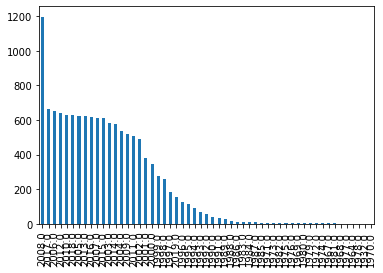

<Figure size 2880x720 with 0 Axes>

In [66]:
df['Veh Year'].value_counts().plot(kind='bar')
plt.plot()
plt.figure(figsize=(40,10))
plt.show()  

In [67]:
df['Veh Year'].mean

<bound method Series.mean of 0        1998.0
1        2007.0
2        2008.0
3        2015.0
4        2017.0
          ...  
12959    2016.0
12960    2004.0
12961    2008.0
12962    2007.0
12963    2008.0
Name: Veh Year, Length: 12964, dtype: float64>

In [68]:
#Remapping Veh Year column to Veh Age
df.rename(columns = {"Veh Year": "Veh_Age"}, inplace=True)

In [69]:
df["Veh_Age"].dtype

dtype('float64')

In [70]:
df['Veh_Age'] = 2019 - (df['Veh_Age'])

In [71]:
df['Veh_Age'].value_counts()

11.0    1197
2.0      663
13.0     650
7.0      639
9.0      627
1.0      626
14.0     625
6.0      624
3.0      619
12.0     614
4.0      609
16.0     583
5.0      574
15.0     537
10.0     520
8.0      505
17.0     491
18.0     378
19.0     345
20.0     275
21.0     261
22.0     181
0.0      153
23.0     127
24.0     116
25.0      94
26.0      70
27.0      58
29.0      39
28.0      35
30.0      28
31.0      17
33.0      11
35.0       9
36.0       9
32.0       8
34.0       7
48.0       5
46.0       4
50.0       3
39.0       3
37.0       3
44.0       3
43.0       3
52.0       2
47.0       2
38.0       2
45.0       2
40.0       2
51.0       1
49.0       1
42.0       1
41.0       1
55.0       1
87.0       1
Name: Veh_Age, dtype: int64

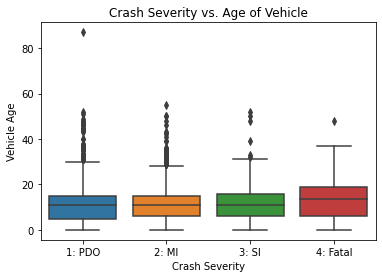

In [72]:
sns.boxplot(x='CSEF Severity', y='Veh_Age', data=df)
plt.xlabel('Crash Severity')
plt.ylabel('Vehicle Age')
plt.title('Crash Severity vs. Age of Vehicle')
fig = plt.gcf()
fig.savefig('Crash Severity vs Vehicle Age.png')

<AxesSubplot:>

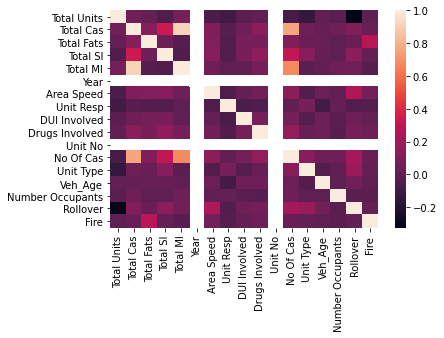

In [73]:
sns.heatmap(df.corr())

In [74]:
Modern_Veh = df['Veh_Age'] < 20
df.loc[Modern_Veh, 'Veh_Age'] = 1
Medium_Veh = (df['Veh_Age'] >= 20) & (df['Veh_Age'] <= 40)
df.loc[Medium_Veh, 'Veh_Age'] = 2
Vintage_Veh = df['Veh_Age'] >40
df.loc[Vintage_Veh, 'Veh_Age'] = 3

In [75]:
df['Veh_Age'].value_counts()

1.0    11579
2.0     1355
3.0       30
Name: Veh_Age, dtype: int64

In [76]:
df.isnull().sum()

REPORT_ID                0
Stats Area               0
Total Units              0
Total Cas                0
Total Fats               0
Total SI                 0
Total MI                 0
Year                     0
Month                    0
Day                      0
Time                     0
Area Speed               0
Position Type            0
Horizontal Align         0
Vertical Align           0
Other Feat               0
Road Surface             0
Moisture Cond            0
Weather Cond             0
DayNight                 0
Crash Type               0
Unit Resp                0
Entity Code              0
CSEF Severity            0
Traffic Ctrls            0
DUI Involved             0
Drugs Involved           0
Unit No                  0
No Of Cas                0
Veh Reg State            0
Unit Type                0
Veh_Age                  0
Direction Of Travel      1
Sex                    343
Age                    343
Lic State              769
Licence Class          747
L

In [77]:
df['Direction Of Travel'].value_counts()

North         1939
South         1838
North East    1720
South West    1635
West          1553
East          1523
North West    1419
South East    1334
Unknown          2
Name: Direction Of Travel, dtype: int64

In [78]:
df.loc[df['Direction Of Travel'].isnull()]

,REPORT_ID,Stats Area,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
9065,2019-9066-8/07/2020,2 Metropolitan,4,1,0,0,1,2019,September,Thursday,08:25 pm,60,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Animal,1,Animal,2: MI,No Control,0.0,0.0,1,0,SA,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


As there are only 3 values that are null/Unknown, I will replace them with North. I don't believe this will have a great influence on the results.

In [79]:
df['Direction Of Travel'].replace('Unknown', 'North', inplace=True)

In [80]:
df['Direction Of Travel'].fillna(value='North', inplace=True)

In [81]:
df['Direction Of Travel'].isnull().sum()

0

In [82]:
df['Direction Of Travel'].value_counts()

North         1942
South         1838
North East    1720
South West    1635
West          1553
East          1523
North West    1419
South East    1334
Name: Direction Of Travel, dtype: int64

Targeting encoding direction of travel will follow

In [83]:
print(df['Sex'].value_counts())
print(df['Sex'].isnull().sum())

Male       7676
Female     4645
Unknown     300
Name: Sex, dtype: int64
343


In [84]:
#I will fill the NaN values with male and the 'Unknown' values with female - this will roughly preserve the ~60/40 split that is observed in the data
df['Sex'].fillna(value='Male', inplace=True)
df['Sex'].replace('Unknown', 'Female', inplace=True)

In [85]:
print(df['Sex'].value_counts(normalize=True))
print(df['Sex'].isnull().sum())

Male      0.618559
Female    0.381441
Name: Sex, dtype: float64
0


In [86]:
df['Sex'].replace('Male', 1, inplace=True)
df['Sex'].replace('Female', 0, inplace=True)

# Male = 1; Female = 0
print(df['Sex'].value_counts())

1    8019
0    4945
Name: Sex, dtype: int64


In [87]:
print(df['Age'].value_counts())
print(df['Age'].isnull().sum())

020    377
019    365
021    352
XXX    348
022    344
      ... 
009      2
004      1
008      1
097      1
006      1
Name: Age, Length: 90, dtype: int64
343


In [88]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [89]:
print(df['Age'].value_counts())
print(df['Age'].unique())

20.0    377
19.0    365
21.0    352
22.0    344
23.0    325
       ... 
9.0       2
97.0      1
6.0       1
4.0       1
8.0       1
Name: Age, Length: 89, dtype: int64
[85. 21. nan 31. 26. 56. 46. 19. 37. 18. 40. 17. 48. 24. 41. 58. 16. 27.
 44. 87. 28. 35. 50. 34. 63. 23. 61. 49. 32. 82. 29. 38. 67. 43. 42. 30.
 71. 55. 22. 53. 36. 33. 39. 72. 25. 62. 20. 13. 54. 47. 65. 80. 60. 52.
 57. 74. 59. 51. 75. 81. 68. 70. 94. 79. 66. 45. 69. 76. 90. 88. 78. 64.
 15. 77. 73. 83. 12. 84. 86. 89. 11. 91.  9. 14. 92. 93.  8.  4.  6. 97.]


In [90]:
df['Age'].isna().sum()

691

In [91]:
print(df['Age'].mean(skipna=True))

40.82188543958282


In [92]:
print(df['Age'].median(skipna=True))

37.0


In [93]:
df.groupby("Sex")["Age"].median()

Sex
0    37.0
1    37.0
Name: Age, dtype: float64

In [94]:
df['Age'].fillna(df.groupby(by=['Sex'])['Age'].transform("median"), inplace=True)

In [95]:
df['Age'].fillna(37, inplace=True)

In [96]:
df['Age'].isna().sum()

0

In [97]:
df['Age'].value_counts()

37.0    900
20.0    377
19.0    365
21.0    352
22.0    344
       ... 
9.0       2
97.0      1
6.0       1
4.0       1
8.0       1
Name: Age, Length: 89, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

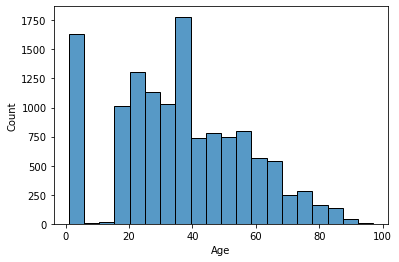

In [272]:
sns.histplot(x= 'Age', data=df, bins = 20)

In [274]:
df.Age.min()

1.0

In [275]:
df.Age.max()

97.0

In [273]:
df.loc[df['Age'] < 12]

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Sealed Road,Dry Road,Raining,Daytime,Crash Type,Unit Resp,Entity Code,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-14-8/07/2020,2,3,1,3,4,1,1,0,1,0,0,1,1,1,1,0.0,0.0,1,0.366998,1,1.0,0.386047,0,1.0,0.36522,8,0.0,0.377448,1.0,0.0,0.0
2019-34-8/07/2020,2,2,0,2,1,1,1,1,1,0,1,1,2,1,5,0.0,0.0,1,0.366998,1,1.0,0.373232,1,2.0,0.36522,8,0.0,0.377448,1.0,0.0,0.0
2019-55-8/07/2020,2,2,1,2,1,2,1,1,1,0,1,1,2,1,1,0.0,0.0,1,0.366998,1,1.0,0.372093,1,1.0,0.36522,8,0.0,0.395788,1.0,0.0,0.0
2019-70-8/07/2020,2,2,0,2,3,1,1,1,1,0,1,1,2,1,1,0.0,0.0,1,0.366998,1,1.0,0.369607,0,1.0,0.36522,8,0.0,0.395788,1.0,0.0,0.0
2019-76-8/07/2020,3,1,1,3,3,1,1,0,1,0,1,3,1,1,1,0.0,0.0,1,0.366998,1,1.0,0.382263,0,1.0,0.36522,6,0.0,0.377448,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12899-8/07/2020,2,3,0,3,3,2,1,1,1,0,0,2,1,1,1,0.0,0.0,1,0.366998,1,1.0,0.373232,0,1.0,0.36522,7,0.0,0.377448,1.0,0.0,0.0
2019-12900-8/07/2020,2,2,0,3,1,2,1,1,1,0,1,1,2,1,3,0.0,0.0,1,0.366998,1,2.0,0.369607,1,2.0,0.36522,8,0.0,0.333984,1.0,0.0,0.0
2019-12924-8/07/2020,1,2,1,2,1,1,1,1,1,0,1,1,2,1,5,0.0,0.0,1,0.366998,1,1.0,0.382263,0,3.0,0.36522,8,0.0,0.377448,1.0,0.0,0.0


In [100]:
df.isnull().sum()

REPORT_ID                0
Stats Area               0
Total Units              0
Total Cas                0
Total Fats               0
Total SI                 0
Total MI                 0
Year                     0
Month                    0
Day                      0
Time                     0
Area Speed               0
Position Type            0
Horizontal Align         0
Vertical Align           0
Other Feat               0
Road Surface             0
Moisture Cond            0
Weather Cond             0
DayNight                 0
Crash Type               0
Unit Resp                0
Entity Code              0
CSEF Severity            0
Traffic Ctrls            0
DUI Involved             0
Drugs Involved           0
Unit No                  0
No Of Cas                0
Veh Reg State            0
Unit Type                0
Veh_Age                  0
Direction Of Travel      0
Sex                      0
Age                      0
Lic State              769
Licence Class          747
L

In [101]:
df['Lic State'].value_counts()

SA         11330
UNKNOWN      529
VIC          137
NSW           53
QLD           46
O/S           43
WA            33
NT            18
TAS            4
ACT            2
Name: Lic State, dtype: int64

I will make all unknown/NaN licence into SA licence by default

In [102]:
df['Lic State'].fillna('SA', inplace=True)

In [103]:
df['Lic State'].replace('UNKNOWN', 'SA', inplace=True)

In [104]:
df['Lic State'].value_counts()

SA     12628
VIC      137
NSW       53
QLD       46
O/S       43
WA        33
NT        18
TAS        4
ACT        2
Name: Lic State, dtype: int64

In [105]:
df.isnull().sum()

REPORT_ID                0
Stats Area               0
Total Units              0
Total Cas                0
Total Fats               0
Total SI                 0
Total MI                 0
Year                     0
Month                    0
Day                      0
Time                     0
Area Speed               0
Position Type            0
Horizontal Align         0
Vertical Align           0
Other Feat               0
Road Surface             0
Moisture Cond            0
Weather Cond             0
DayNight                 0
Crash Type               0
Unit Resp                0
Entity Code              0
CSEF Severity            0
Traffic Ctrls            0
DUI Involved             0
Drugs Involved           0
Unit No                  0
No Of Cas                0
Veh Reg State            0
Unit Type                0
Veh_Age                  0
Direction Of Travel      0
Sex                      0
Age                      0
Lic State                0
Licence Class          747
L

In [106]:
df['Licence Class'].value_counts()

C       9249
HR       519
C R      504
XX       459
HC       251
MR       246
MC       175
HRR      151
C RD     145
HCR      137
MRR       89
MCR       85
LR        60
RD        46
LRR       34
R         30
HRRD      14
HCRD       7
MRRD       7
XXR        3
MCRD       2
XXXX       2
C XX       1
XXRD       1
Name: Licence Class, dtype: int64

C Car

LR Light Rigid

MR Medium Rigid

HR Heavy Rigid

HC Heavy Combination

MC Multi Combination

R-DATE Motorcycle or trike with an engine capacity up to 660 ml and a power-to-weight ratio not exceeding 150 kw/tonne

R Motorcycle

https://www.sa.gov.au/topics/driving-and-transport/licences/licence-details/driver-s-licence-classes

I would have preferred information on licence types to stratify into a level of experience for the driver, i.e learners, P plate etc. As it stands, this list of licence types doesn't indicate the driver's level of experience and for that reason I don't believe it to be informative for my model. I will drop this column.

In [107]:
df.drop(columns = 'Licence Class', inplace=True)

In [108]:
df.isnull().sum()

REPORT_ID                0
Stats Area               0
Total Units              0
Total Cas                0
Total Fats               0
Total SI                 0
Total MI                 0
Year                     0
Month                    0
Day                      0
Time                     0
Area Speed               0
Position Type            0
Horizontal Align         0
Vertical Align           0
Other Feat               0
Road Surface             0
Moisture Cond            0
Weather Cond             0
DayNight                 0
Crash Type               0
Unit Resp                0
Entity Code              0
CSEF Severity            0
Traffic Ctrls            0
DUI Involved             0
Drugs Involved           0
Unit No                  0
No Of Cas                0
Veh Reg State            0
Unit Type                0
Veh_Age                  0
Direction Of Travel      0
Sex                      0
Age                      0
Lic State                0
Licence Type           748
T

In [109]:
df['Licence Type'].value_counts()

Full              9624
Provisional 2      911
Provisional 1      629
Unknown            422
Unlicenced         326
Learners           213
Probationary        71
Disqualified        19
Conditional          1
Name: Licence Type, dtype: int64

Without knowing the licence type, I will have to assume Full licence Type for drivers and will replace Unknown/NaN values as such.

In [110]:
df['Licence Type'].fillna('Full', inplace=True)

In [111]:
df['Licence Type'].replace('Unknown', 'Full', inplace=True)

In [112]:
df['Licence Type'].value_counts()

Full              10794
Provisional 2       911
Provisional 1       629
Unlicenced          326
Learners            213
Probationary         71
Disqualified         19
Conditional           1
Name: Licence Type, dtype: int64

In [113]:
lic_type_di = {'Unlicenced': 1, 'Disqualified': 2, 'Learners': 3, 'Conditional': 4, 'Probationary': 5, 'Provisional 1 ': 6, 'Provisional 2': 7, 'Full': 8}

df['Licence Type'] = df['Licence Type'].replace(lic_type_di, inplace=False)

In [114]:
df['Licence Type'].value_counts()

8    10794
7      911
6      629
1      326
3      213
5       71
2       19
4        1
Name: Licence Type, dtype: int64

In [115]:
print(df['Towing'].value_counts())
print(df['Towing'].isnull().sum())

Not Towing                12000
Trailer                     379
Unknown                      83
Caravan                      13
Boat                          2
Motor Vehicle                 1
Agricultural Implement        1
Horse Float                   1
Other                         1
Name: Towing, dtype: int64
483


In [116]:
not_towing = ['Not Towing', 'Unknown']
towing = ['Trailer', 'Caravan', 'Boat', 'Agricultural Implement', 'Horse Float', 'Other', 'Motor Vehicle']
df['Towing'].replace(not_towing, 0, inplace=True)
df['Towing'].replace(towing, 1, inplace=True)

In [117]:
df['Towing'].fillna(0, inplace=True)

In [118]:
print(df['Towing'].value_counts())
print(df['Towing'].isnull().sum())

0.0    12566
1.0      398
Name: Towing, dtype: int64
0


In [119]:
df.isnull().sum()

REPORT_ID               0
Stats Area              0
Total Units             0
Total Cas               0
Total Fats              0
Total SI                0
Total MI                0
Year                    0
Month                   0
Day                     0
Time                    0
Area Speed              0
Position Type           0
Horizontal Align        0
Vertical Align          0
Other Feat              0
Road Surface            0
Moisture Cond           0
Weather Cond            0
DayNight                0
Crash Type              0
Unit Resp               0
Entity Code             0
CSEF Severity           0
Traffic Ctrls           0
DUI Involved            0
Drugs Involved          0
Unit No                 0
No Of Cas               0
Veh Reg State           0
Unit Type               0
Veh_Age                 0
Direction Of Travel     0
Sex                     0
Age                     0
Lic State               0
Licence Type            0
Towing                  0
Unit Movemen

In [120]:
print(df['Unit Movement'].value_counts())
print(df['Unit Movement'].isnull().sum())

Straight Ahead                            7813
Right Turn                                1429
Stopped on Carriageway                    1377
Swerving                                   538
Left Turn                                  512
Parked                                     403
Leaving Private Driveway                   225
U Turn                                     176
Entering Private Driveway                  160
Reversing                                   77
Overtaking - on Right                       52
UnParking - Parallel                        45
Crossing without Control                    39
Parking - Parallel                          26
Walking on Road                             18
Unparking -Angle                            15
Walking on Footpath                         14
Parking - Angle                             11
Crossing with Traffic Signals               11
Overtaking - on Left                        10
Alighted from Parked Vehicle                 6
On Pedestrian

In [121]:
df['Unit Movement'].replace(['Other', 'Other (e.g. Police on Traffic Control)', 0], 'Miscellaneous', inplace=True)

In [122]:
df['Unit Movement'].fillna('Miscellaneous', inplace=True)

In [123]:
print(df['Unit Movement'].value_counts())
print(df['Unit Movement'].isnull().sum())

Straight Ahead                   7813
Right Turn                       1429
Stopped on Carriageway           1377
Swerving                          538
Left Turn                         512
Parked                            403
Leaving Private Driveway          225
U Turn                            176
Entering Private Driveway         160
Reversing                          77
Overtaking - on Right              52
UnParking - Parallel               45
Crossing without Control           39
Parking - Parallel                 26
Walking on Road                    18
Unparking -Angle                   15
Walking on Footpath                14
Parking - Angle                    11
Crossing with Traffic Signals      11
Overtaking - on Left               10
Alighted from Parked Vehicle        6
On Pedestrian Crossing              4
Miscellaneous                       3
Name: Unit Movement, dtype: int64
0


In [124]:
df.isnull().sum()

REPORT_ID               0
Stats Area              0
Total Units             0
Total Cas               0
Total Fats              0
Total SI                0
Total MI                0
Year                    0
Month                   0
Day                     0
Time                    0
Area Speed              0
Position Type           0
Horizontal Align        0
Vertical Align          0
Other Feat              0
Road Surface            0
Moisture Cond           0
Weather Cond            0
DayNight                0
Crash Type              0
Unit Resp               0
Entity Code             0
CSEF Severity           0
Traffic Ctrls           0
DUI Involved            0
Drugs Involved          0
Unit No                 0
No Of Cas               0
Veh Reg State           0
Unit Type               0
Veh_Age                 0
Direction Of Travel     0
Sex                     0
Age                     0
Lic State               0
Licence Type            0
Towing                  0
Unit Movemen

In [125]:
print(df['Number Occupants'].value_counts())
print(df['Number Occupants'].isnull().sum())

1.0     9414
2.0     2123
3.0      558
0.0      342
4.0      239
5.0       83
10.0      24
6.0       19
7.0        9
15.0       8
12.0       6
8.0        6
9.0        5
25.0       5
30.0       4
20.0       3
50.0       3
21.0       3
13.0       3
16.0       2
60.0       2
11.0       2
40.0       2
48.0       1
26.0       1
41.0       1
35.0       1
75.0       1
Name: Number Occupants, dtype: int64
94


#0 occupants doesn't make any sense so I will change to 1 as someone has to be in control of a vehicle to cause an accident. Looking at the types of crashes that have number of occupants = 0, these all seem to be hitting stationery objects so I will impute them as 1 as the crash will be from the point of view of the person who crashed. I will also impute the NaN as 1 also.

In [126]:
df.loc[df['Number Occupants'] == 0]

,REPORT_ID,Stats Area,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
21,2019-22-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Tuesday,06:00 pm,40,Not Divided,Straight road,Level,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Hit Parked Vehicle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,North,1,37.0,SA,8,0.0,Parked,0.0,0.0,0.0
98,2019-99-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Friday,08:30 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Parked Vehicle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,North West,1,37.0,SA,8,0.0,Parked,0.0,0.0,0.0
103,2019-104-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Saturday,07:32 pm,50,Not Divided,"CURVED, VIEW OPEN",Slope,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Fixed Object,1,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,South,1,37.0,SA,8,0.0,UnParking - Parallel,0.0,0.0,0.0
105,2019-106-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Saturday,08:25 am,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Parked Vehicle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,South East,1,37.0,SA,8,0.0,Parked,0.0,0.0,0.0
113,2019-114-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Saturday,03:00 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Parked Vehicle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,West,1,37.0,SA,8,0.0,Parked,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12817,2019-12818-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,December,Wednesday,09:45 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Parked Vehicle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,North East,1,37.0,SA,8,0.0,Parked,0.0,0.0,0.0
12860,2019-12861-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,December,Friday,04:30 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Parked Vehicle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,North East,1,37.0,SA,8,0.0,Parked,0.0,0.0,0.0
12867,2019-12868-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,December,Saturday,08:20 am,60,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Parked Vehicle,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,South West,1,37.0,SA,8,0.0,Parked,0.0,0.0,0.0
12939,2019-12940-8/07/2020,2 Metropolitan,3,0,0,0,0,2019,December,Tuesday,05:30 pm,50,Not Divided,"CURVED, VIEW OPEN",Slope,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Hit Fixed Object,1,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,South East,1,37.0,SA,8,0.0,Straight Ahead,0.0,0.0,0.0


In [127]:
df['Crash Type'].value_counts()

Rear End                      3346
Right Angle                   2469
Hit Fixed Object              2012
Side Swipe                    1433
Right Turn                    1050
Hit Parked Vehicle             983
Roll Over                      544
Hit Pedestrian                 439
Head On                        244
Hit Animal                     186
Other                           96
Left Road - Out of Control      94
Hit Object on Road              68
Name: Crash Type, dtype: int64

In [128]:
df['Number Occupants'].replace(0, 1, inplace=True)
print(df['Number Occupants'].value_counts())

1.0     9756
2.0     2123
3.0      558
4.0      239
5.0       83
10.0      24
6.0       19
7.0        9
15.0       8
8.0        6
12.0       6
9.0        5
25.0       5
30.0       4
20.0       3
50.0       3
21.0       3
13.0       3
40.0       2
60.0       2
11.0       2
16.0       2
48.0       1
26.0       1
41.0       1
35.0       1
75.0       1
Name: Number Occupants, dtype: int64


In [129]:
df[df.filter(like='Number Occupants').isnull().any(1)]

,REPORT_ID,Stats Area,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
168,2019-169-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Saturday,03:30 pm,60,Divided Road,Straight road,Level,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Hit Pedestrian,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,7,1.0,West,0,68.0,SA,8,0.0,Walking on Footpath,NaN,0.0,0.0
258,2019-259-8/07/2020,2 Metropolitan,3,1,0,1,0,2019,January,Thursday,11:51 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,1,Pedestrian,3: SI,No Control,0.0,1.0,1,1,SA,7,1.0,East,1,49.0,SA,8,0.0,Alighted from Parked Vehicle,NaN,0.0,0.0
413,2019-414-8/07/2020,1 City,2,1,0,0,1,2019,January,Wednesday,08:15 am,50,Not Divided,Straight road,Level,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Hit Pedestrian,2,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,7,1.0,East,0,70.0,SA,8,0.0,Walking on Footpath,NaN,0.0,0.0
423,2019-424-8/07/2020,1 City,2,1,0,0,1,2019,January,Sunday,04:50 am,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,1,Pedestrian,2: MI,No Control,0.0,0.0,1,1,SA,7,1.0,North,0,37.0,SA,8,0.0,Crossing without Control,NaN,0.0,0.0
510,2019-511-8/07/2020,3 Country,2,1,0,0,1,2019,January,Saturday,02:43 am,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,1,Pedestrian,2: MI,No Control,0.0,0.0,1,1,SA,7,1.0,North East,0,20.0,SA,8,0.0,Walking on Road,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12398,2019-12399-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,December,Monday,03:15 pm,25,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Pedestrian,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,7,1.0,North East,1,66.0,SA,8,0.0,Walking on Road,NaN,0.0,0.0
12435,2019-12436-8/07/2020,1 City,2,0,0,0,0,2019,December,Friday,11:50 pm,50,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,1,Pedestrian,1: PDO,No Control,0.0,0.0,1,0,SA,5,1.0,East,1,26.0,SA,8,0.0,Walking on Road,NaN,0.0,0.0
12561,2019-12562-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,December,Tuesday,01:15 pm,60,T-Junction,Straight road,Level,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Hit Pedestrian,2,Driver Rider,1: PDO,Traffic Signals,0.0,0.0,1,0,SA,7,1.0,South East,1,30.0,SA,8,0.0,Crossing without Control,NaN,0.0,0.0
12859,2019-12860-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,December,Friday,07:00 pm,60,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Hit Pedestrian,1,Pedestrian,1: PDO,No Control,0.0,0.0,1,0,SA,7,1.0,East,0,19.0,SA,8,0.0,Crossing without Control,NaN,0.0,0.0


In [130]:
print(df['Number Occupants'].isnull().sum())

94


In [131]:
df['Number Occupants'].fillna(1, inplace=True)

In [132]:
print(df['Number Occupants'].value_counts())
print(df['Number Occupants'].isnull().sum())

1.0     9850
2.0     2123
3.0      558
4.0      239
5.0       83
10.0      24
6.0       19
7.0        9
15.0       8
8.0        6
12.0       6
9.0        5
25.0       5
30.0       4
20.0       3
50.0       3
21.0       3
13.0       3
40.0       2
60.0       2
11.0       2
16.0       2
48.0       1
26.0       1
41.0       1
35.0       1
75.0       1
Name: Number Occupants, dtype: int64
0


In [133]:
df.isnull().sum()

REPORT_ID              0
Stats Area             0
Total Units            0
Total Cas              0
Total Fats             0
Total SI               0
Total MI               0
Year                   0
Month                  0
Day                    0
Time                   0
Area Speed             0
Position Type          0
Horizontal Align       0
Vertical Align         0
Other Feat             0
Road Surface           0
Moisture Cond          0
Weather Cond           0
DayNight               0
Crash Type             0
Unit Resp              0
Entity Code            0
CSEF Severity          0
Traffic Ctrls          0
DUI Involved           0
Drugs Involved         0
Unit No                0
No Of Cas              0
Veh Reg State          0
Unit Type              0
Veh_Age                0
Direction Of Travel    0
Sex                    0
Age                    0
Lic State              0
Licence Type           0
Towing                 0
Unit Movement          0
Number Occupants       0


Finished reducing null values to zero.

# Pre-processing of columns including one-hot encoding, target encoding, scaling etc.

In [134]:
df['Unit Resp'].value_counts()

1    7494
2    5405
9      64
4       1
Name: Unit Resp, dtype: int64

In [135]:
df.dtypes

REPORT_ID               object
Stats Area              object
Total Units              int64
Total Cas                int64
Total Fats               int64
Total SI                 int64
Total MI                 int64
Year                     int64
Month                   object
Day                     object
Time                    object
Area Speed               int64
Position Type           object
Horizontal Align        object
Vertical Align          object
Other Feat              object
Road Surface            object
Moisture Cond           object
Weather Cond            object
DayNight                object
Crash Type              object
Unit Resp                int64
Entity Code             object
CSEF Severity           object
Traffic Ctrls           object
DUI Involved           float64
Drugs Involved         float64
Unit No                  int64
No Of Cas                int64
Veh Reg State           object
Unit Type                int64
Veh_Age                float64
Directio

In [136]:
df.set_index('REPORT_ID')

,Stats Area,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,June,Wednesday,11:15 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,1,Driver Rider,1: PDO,Give Way Sign,0.0,0.0,1,0,SA,1,2.0,South,0,85.0,SA,8,0.0,Right Turn,1.0,0.0,0.0
2019-2-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Tuesday,12:49 am,90,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Rear End,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,North East,1,21.0,SA,7,0.0,Straight Ahead,4.0,0.0,0.0
2019-3-8/07/2020,2 Metropolitan,2,1,0,0,1,2019,January,Tuesday,12:00 am,60,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,1,Driver Rider,2: MI,No Control,0.0,0.0,1,0,SA,1,1.0,East,0,37.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0
2019-4-8/07/2020,2 Metropolitan,2,1,0,1,0,2019,January,Tuesday,12:05 am,50,Not Divided,"CURVED, VIEW OPEN",Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Fixed Object,1,Driver Rider,3: SI,No Control,0.0,0.0,1,1,SA,4,1.0,North West,1,21.0,SA,3,0.0,Straight Ahead,1.0,0.0,0.0
2019-5-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,January,Tuesday,05:15 am,110,Divided Road,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Animal,2,Animal,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,West,1,31.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12960-8/07/2020,2 Metropolitan,2,1,0,0,1,2019,November,Thursday,12:30 pm,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,Traffic Signals,0.0,0.0,1,1,SA,1,1.0,North,1,59.0,SA,8,0.0,Stopped on Carriageway,1.0,0.0,0.0
2019-12961-8/07/2020,2 Metropolitan,2,0,0,0,0,2019,December,Tuesday,11:45 pm,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Parked Vehicle,1,Driver Rider,1: PDO,No Control,0.0,0.0,1,0,SA,1,1.0,North East,1,38.0,SA,6,0.0,Straight Ahead,3.0,0.0,0.0
2019-12962-8/07/2020,3 Country,2,1,0,0,1,2019,December,Friday,03:30 pm,50,Not Divided,Straight road,Slope,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Side Swipe,2,Driver Rider,2: MI,No Control,0.0,0.0,1,1,SA,5,1.0,North East,1,47.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0


In [137]:
df['Stats Area'].value_counts()

2 Metropolitan    10402
3 Country          1897
1 City              665
Name: Stats Area, dtype: int64

In [138]:
statsdi = {'1 City': 1, '2 Metropolitan': 2, '3 Country': 3}

In [139]:
df['Stats Area'] = df['Stats Area'].replace(statsdi, inplace=False)

In [140]:
df['Stats Area'].value_counts()

2    10402
3     1897
1      665
Name: Stats Area, dtype: int64

In [141]:
df['Total Units'].value_counts()
#Doesn't require encoding

2    10399
3     1582
1      620
4      298
5       42
6       16
7        5
8        2
Name: Total Units, dtype: int64

In [142]:
df.columns

Index(['REPORT_ID', 'Stats Area', 'Total Units', 'Total Cas', 'Total Fats',
       'Total SI', 'Total MI', 'Year', 'Month', 'Day', 'Time', 'Area Speed',
       'Position Type', 'Horizontal Align', 'Vertical Align', 'Other Feat',
       'Road Surface', 'Moisture Cond', 'Weather Cond', 'DayNight',
       'Crash Type', 'Unit Resp', 'Entity Code', 'CSEF Severity',
       'Traffic Ctrls', 'DUI Involved', 'Drugs Involved', 'Unit No',
       'No Of Cas', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [143]:
#I would like to do some visualisations with timeseries information but due to time constraints, I will drop the time information and use the day/night information in the modelling. 
droptime = ['Year', 'Month', 'Day', 'Time']
df = df.drop(droptime, axis=1)

In [144]:
df.columns

Index(['REPORT_ID', 'Stats Area', 'Total Units', 'Total Cas', 'Total Fats',
       'Total SI', 'Total MI', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp',
       'Entity Code', 'CSEF Severity', 'Traffic Ctrls', 'DUI Involved',
       'Drugs Involved', 'Unit No', 'No Of Cas', 'Veh Reg State', 'Unit Type',
       'Veh_Age', 'Direction Of Travel', 'Sex', 'Age', 'Lic State',
       'Licence Type', 'Towing', 'Unit Movement', 'Number Occupants',
       'Rollover', 'Fire'],
      dtype='object')

Going to transform the target column into binary - confirmation of casualty or not

0    8188
1    3909
2     625
3     147
4      61
5      22
6       9
7       2
9       1
Name: Total Cas, dtype: int64


<AxesSubplot:>

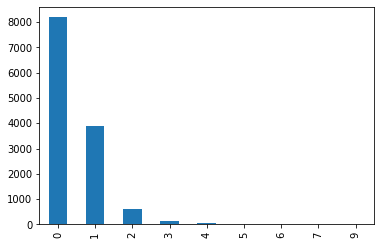

In [145]:
print(dfcrash['Total Cas'].value_counts(normalize=False))

dfcrash['Total Cas'].value_counts().plot(kind='bar')

In [146]:
mask_cas = dfcrash['Total Cas'] >= 1
df.loc[mask_cas, 'Total Cas'] = 1

In [147]:
print(df['Total Cas'].value_counts(normalize=True))
print(df['Total Cas'].value_counts())

0    0.631595
1    0.368405
Name: Total Cas, dtype: float64
0    8188
1    4776
Name: Total Cas, dtype: int64


In [148]:
df.rename(columns = {'Total Cas': 'Casualty'}, inplace=True)

In [149]:
df['Unit No'].value_counts()

1    12964
Name: Unit No, dtype: int64

In [150]:
df['Entity Code'].value_counts()

Driver Rider                   12454
Pedestrian                       227
Animal                           186
Other                             74
Passenger                         21
No Unit or User Responsible        2
Name: Entity Code, dtype: int64

In [151]:
df['No Of Cas'].value_counts()

0    9730
1    2887
2     275
3      47
4      18
5       4
6       2
7       1
Name: No Of Cas, dtype: int64

In [152]:
#I will have to also delete the number of casualties column and the total casualties/fatalities columns as these will confirm the presence of casualties on my unseen data. 
dropcas = ['No Of Cas', 'Total Fats', 'Total SI', 'Total MI']
df.drop(columns=dropcas, inplace=True)

In [153]:
df.columns

Index(['REPORT_ID', 'Stats Area', 'Total Units', 'Casualty', 'Area Speed',
       'Position Type', 'Horizontal Align', 'Vertical Align', 'Other Feat',
       'Road Surface', 'Moisture Cond', 'Weather Cond', 'DayNight',
       'Crash Type', 'Unit Resp', 'Entity Code', 'CSEF Severity',
       'Traffic Ctrls', 'DUI Involved', 'Drugs Involved', 'Unit No',
       'Veh Reg State', 'Unit Type', 'Veh_Age', 'Direction Of Travel', 'Sex',
       'Age', 'Lic State', 'Licence Type', 'Towing', 'Unit Movement',
       'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [154]:
len(df.columns)

34

In [155]:
df.set_index('REPORT_ID', inplace=True)

In [156]:
len(df.columns)

33

In [157]:
df.head()

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2,2,0,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,1,Driver Rider,1: PDO,Give Way Sign,0.0,0.0,1,SA,1,2.0,South,0,85.0,SA,8,0.0,Right Turn,1.0,0.0,0.0
2019-2-8/07/2020,2,2,0,90,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Rear End,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,SA,1,1.0,North East,1,21.0,SA,7,0.0,Straight Ahead,4.0,0.0,0.0
2019-3-8/07/2020,2,2,1,60,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,1,Driver Rider,2: MI,No Control,0.0,0.0,1,SA,1,1.0,East,0,37.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0
2019-4-8/07/2020,2,2,1,50,Not Divided,"CURVED, VIEW OPEN",Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Fixed Object,1,Driver Rider,3: SI,No Control,0.0,0.0,1,SA,4,1.0,North West,1,21.0,SA,3,0.0,Straight Ahead,1.0,0.0,0.0
2019-5-8/07/2020,2,2,0,110,Divided Road,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Animal,2,Animal,1: PDO,No Control,0.0,0.0,1,SA,1,1.0,West,1,31.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0


In [158]:
dfcrash['Area Speed'].value_counts()

60     6136
50     3365
80     1171
100     740
110     547
70      424
90      259
40      249
25       39
10       14
20       11
30        5
5         3
15        1
Name: Area Speed, dtype: int64

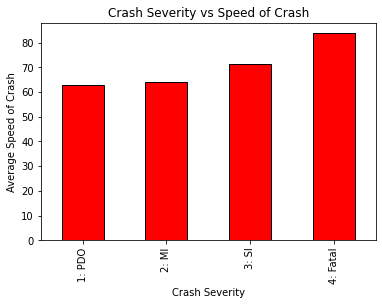

In [159]:
df.groupby("CSEF Severity")["Area Speed"].mean().plot(kind='bar', color='red', ec='black')
plt.xlabel('Crash Severity')
plt.ylabel('Average Speed of Crash')
plt.title("Crash Severity vs Speed of Crash")
fig = plt.gcf()
fig.savefig('Crash Severity vs Speed of Crash.png')

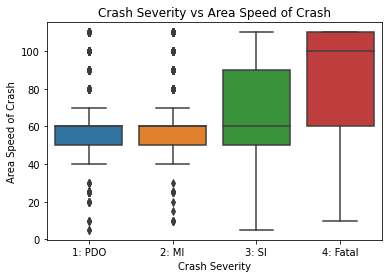

In [160]:
sns.boxplot(x= "CSEF Severity", y="Area Speed", data=df)
plt.xlabel('Crash Severity')
plt.ylabel('Area Speed of Crash')
plt.title("Crash Severity vs Area Speed of Crash")
fig = plt.gcf()
fig.savefig('Crash Severity vs Area Speed of Crash Box.png')

In [161]:
slow_speed = [5, 10, 15, 20, 25, 30, 40]
med_speed = [50, 60]
high_speed = [70, 80, 90, 100, 110]

In [162]:
df.replace(to_replace = slow_speed, value = 1, inplace=True)
df.replace(to_replace = med_speed, value = 2, inplace=True)
df.replace(to_replace = high_speed, value = 3, inplace = True)

In [163]:
df['Area Speed'].value_counts()

2    9501
3    3141
1     322
Name: Area Speed, dtype: int64

In [164]:
df.columns

Index(['Stats Area', 'Total Units', 'Casualty', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp',
       'Entity Code', 'CSEF Severity', 'Traffic Ctrls', 'DUI Involved',
       'Drugs Involved', 'Unit No', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [165]:
df['Position Type'].value_counts()

Not Divided            4166
T-Junction             3011
Cross Road             2737
Divided Road           2608
Freeway                 160
Multiple                109
Pedestrian Crossing      41
One Way                  32
Other                    22
Rail Crossing            21
Rail Xing                14
Interchange              12
Ramp Off                 12
Ramp On                   8
Y-Junction                8
Crossover                 3
Name: Position Type, dtype: int64

I'm going to group position types into high speed/divided roads, residential/slow speed road, intersections

In [166]:
intersections = ['T-Junction', 'Cross Road', 'Rail Crossing', 'Rail Xing', 'Y-Junction']
slowroad = ['Pedestrian Crossing', 'One Way', 'Other', 'Crossover']
normalroad = ['Not Divided']
highspeed = ['Divided Road', 'Freeway', 'Multiple', 'Interchange', 'Ramp Off', 'Ramp On']

In [167]:
df.replace(to_replace = intersections, value = 1, inplace=True)
df.replace(to_replace = slowroad, value = 2, inplace=True)
df.replace(to_replace = normalroad, value = 3, inplace = True)
df.replace(to_replace = highspeed, value = 4, inplace = True)

In [168]:
df['Position Type'].value_counts()

1    5791
3    4166
4    2909
2      98
Name: Position Type, dtype: int64

I will include the slowroad values in with the normalroad - chances are some of those are within a normal, undivided, 60km/h zones anyway.

In [169]:
df['Position Type'].replace(2, 3, inplace=True)

In [170]:
df['Position Type'].value_counts()

1    5791
3    4264
4    2909
Name: Position Type, dtype: int64

In [171]:
df.columns

Index(['Stats Area', 'Total Units', 'Casualty', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp',
       'Entity Code', 'CSEF Severity', 'Traffic Ctrls', 'DUI Involved',
       'Drugs Involved', 'Unit No', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [172]:
df['Horizontal Align'].value_counts()

Straight road            11308
CURVED, VIEW OPEN         1175
CURVED, VIEW OBSCURED      475
Unknown                      6
Name: Horizontal Align, dtype: int64

In [173]:
df['Horizontal Align'].replace('Unknown', 1, inplace=True)
df['Horizontal Align'].replace('Straight road', 1, inplace=True)
df['Horizontal Align'].replace('CURVED, VIEW OPEN', 2, inplace=True)
df['Horizontal Align'].replace('CURVED, VIEW OBSCURED', 3, inplace=True)

In [174]:
df['Horizontal Align'].value_counts()

1    11314
2     1175
3      475
Name: Horizontal Align, dtype: int64

In [175]:
df['Vertical Align'].value_counts()

Level             10995
Slope              1564
Crest of Hill       205
Bottom of Hill      164
Unknown              36
Name: Vertical Align, dtype: int64

In [176]:
df['Vertical Align'].replace('Unknown', 1, inplace=True)
df['Vertical Align'].replace('Level', 1, inplace=True)
df['Vertical Align'].replace('Slope', 2, inplace=True)
df['Vertical Align'].replace('Bottom of Hill', 3, inplace=True)
df['Vertical Align'].replace('Crest of Hill', 4, inplace=True)

print(df['Vertical Align'].value_counts())

1    11031
2     1564
4      205
3      164
Name: Vertical Align, dtype: int64


In [177]:
df['Other Feat'].value_counts(normalize=True)

Not Applicable                  0.908516
Driveway or Entrance            0.065335
Roadworks                       0.009951
Bridge, Culvert, Causeway       0.006325
Median Opening (not at I/S)     0.004937
Unknown                         0.003008
Road hump or Slow point         0.001466
Additional Control Operating    0.000386
Control Not Operational         0.000077
Name: Other Feat, dtype: float64

As such a large majority of the Other Feats are not applicable, I am going to drop this column - I imagine that majority of the information is included in the other features. I imagine the 90% of this might be due to police not documenting any further information and is less related to physical factors that have contributed to the crash.

In [178]:
df.drop(columns='Other Feat', inplace=True)

In [179]:
df.columns

Index(['Stats Area', 'Total Units', 'Casualty', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Road Surface', 'Moisture Cond',
       'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'Unit No', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [180]:
df['Road Surface'].value_counts()

Sealed      12591
Unsealed      372
Unknown         1
Name: Road Surface, dtype: int64

In [181]:
df['Road Surface'].replace('Unknown', 1, inplace=True)
df['Road Surface'].replace('Sealed', 1, inplace=True)
df['Road Surface'].replace('Unsealed', 0, inplace=True)

print(df['Road Surface'].value_counts())

1    12592
0      372
Name: Road Surface, dtype: int64


In [182]:
df.rename(columns = {'Road Surface': 'Sealed Road'}, inplace=True)

In [183]:
df.columns

Index(['Stats Area', 'Total Units', 'Casualty', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Sealed Road', 'Moisture Cond',
       'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'Unit No', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [184]:
df['Moisture Cond'].value_counts()

Dry        11614
Wet         1327
Unknown       23
Name: Moisture Cond, dtype: int64

In [185]:
df['Moisture Cond'].replace('Unknown', 1, inplace=True)
df['Moisture Cond'].replace('Dry', 1, inplace=True)
df['Moisture Cond'].replace('Wet', 0, inplace=True)

print(df['Moisture Cond'].value_counts())

1    11637
0     1327
Name: Moisture Cond, dtype: int64


In [186]:
df.rename(columns = {'Moisture Cond': 'Dry Road'}, inplace=True)

In [187]:
df.columns

Index(['Stats Area', 'Total Units', 'Casualty', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Sealed Road', 'Dry Road',
       'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'Unit No', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [188]:
df['Weather Cond'].value_counts()

Not Raining    12050
Raining          866
Unknown           48
Name: Weather Cond, dtype: int64

In [189]:
df['Weather Cond'].replace('Unknown', 0, inplace=True)
df['Weather Cond'].replace('Raining', 1, inplace=True)
df['Weather Cond'].replace('Not Raining', 0, inplace=True)

print(df['Weather Cond'].value_counts())

df.rename(columns = {'Weather Cond': 'Raining'}, inplace=True)

0    12098
1      866
Name: Weather Cond, dtype: int64


In [190]:
df.columns

Index(['Stats Area', 'Total Units', 'Casualty', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Sealed Road', 'Dry Road',
       'Raining', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'Unit No', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [191]:
print(df['DayNight'].value_counts())

Daylight    9930
Night       3034
Name: DayNight, dtype: int64


In [192]:
df['DayNight'].replace('Daylight', 1, inplace=True)
df['DayNight'].replace('Night', 0, inplace=True)

print(df['DayNight'].value_counts())

df.rename(columns = {'DayNight': 'Daytime'}, inplace=True)

1    9930
0    3034
Name: DayNight, dtype: int64


In [193]:
df.columns

Index(['Stats Area', 'Total Units', 'Casualty', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Sealed Road', 'Dry Road',
       'Raining', 'Daytime', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'Unit No', 'Veh Reg State', 'Unit Type', 'Veh_Age',
       'Direction Of Travel', 'Sex', 'Age', 'Lic State', 'Licence Type',
       'Towing', 'Unit Movement', 'Number Occupants', 'Rollover', 'Fire'],
      dtype='object')

In [194]:
df['Crash Type'].value_counts()

Rear End                      3346
Right Angle                   2469
Hit Fixed Object              2012
Side Swipe                    1433
Right Turn                    1050
Hit Parked Vehicle             983
Roll Over                      544
Hit Pedestrian                 439
Head On                        244
Hit Animal                     186
2                               96
Left Road - Out of Control      94
Hit Object on Road              68
Name: Crash Type, dtype: int64

I believe I changed my 'other' values while I was making the lists for the Position Type feature engineering. 

I will classify Crash Types into: two+ cars hitting each other, car hitting something that shouldn't be on the road, car hitting stationary object, loss of control. 'Other' will go into loss of control and I believe not having it classified into an existing category shows it can be simply described as loss of control.

In [195]:
df['Crash Type'].replace(2, 'Other', inplace=True)

In [196]:
df['Crash Type'].replace(['Rear End', 'Right Angle', 'Side Swipe', 'Head On', 'Right Turn'], 1, inplace=True)
df['Crash Type'].replace(['Hit Fixed Object', 'Hit Parked Vehicle', 'Hit Object on Road'], 2, inplace=True)
df['Crash Type'].replace(['Hit Pedestrian', 'Hit Animal', 'Hit Object on Road'], 3, inplace=True)
df['Crash Type'].replace(['Roll Over', 'Left Road - Out of Control', 'Other'], 3, inplace=True)

print(df['Crash Type'].value_counts())

1    8542
2    3063
3    1359
Name: Crash Type, dtype: int64


In [197]:
df.head()

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Sealed Road,Dry Road,Raining,Daytime,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2,2,0,2,1,1,1,1,1,0,1,1,1,Driver Rider,1: PDO,Give Way Sign,0.0,0.0,1,SA,1,2.0,South,0,85.0,SA,8,0.0,Right Turn,1.0,0.0,0.0
2019-2-8/07/2020,2,2,0,3,4,1,1,1,1,0,0,1,2,Driver Rider,1: PDO,No Control,0.0,0.0,1,SA,1,1.0,North East,1,21.0,SA,7,0.0,Straight Ahead,4.0,0.0,0.0
2019-3-8/07/2020,2,2,1,2,4,1,1,1,1,0,0,3,1,Driver Rider,2: MI,No Control,0.0,0.0,1,SA,1,1.0,East,0,37.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0
2019-4-8/07/2020,2,2,1,2,3,2,1,1,1,0,0,2,1,Driver Rider,3: SI,No Control,0.0,0.0,1,SA,4,1.0,North West,1,21.0,SA,3,0.0,Straight Ahead,1.0,0.0,0.0
2019-5-8/07/2020,2,2,0,3,4,1,2,1,1,0,0,3,2,Animal,1: PDO,No Control,0.0,0.0,1,SA,1,1.0,West,1,31.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0


In [198]:
df['Entity Code'].value_counts()

Driver Rider                   12454
Pedestrian                       227
Animal                           186
2                                 74
Passenger                         21
No Unit or User Responsible        2
Name: Entity Code, dtype: int64

In [199]:
df['Entity Code'].replace(2, 'Other', inplace=True)
print(df['Entity Code'].value_counts())

Driver Rider                   12454
Pedestrian                       227
Animal                           186
Other                             74
Passenger                         21
No Unit or User Responsible        2
Name: Entity Code, dtype: int64


In [200]:
df['Entity Code'].replace(['Driver Rider'], 1, inplace=True)
df['Entity Code'].replace(['Pedestrian'], 2, inplace=True)
df['Entity Code'].replace(['Animal'], 3, inplace=True)
df['Entity Code'].replace(['Other'], 4, inplace=True)
df['Entity Code'].replace(['Passenger'], 5, inplace=True)
df['Entity Code'].replace(['No Unit or User Responsible'], 6, inplace=True)

print(df['Entity Code'].value_counts())

1    12454
2      227
3      186
4       74
5       21
6        2
Name: Entity Code, dtype: int64


In [201]:
df.head(3)

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Sealed Road,Dry Road,Raining,Daytime,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2,2,0,2,1,1,1,1,1,0,1,1,1,1,1: PDO,Give Way Sign,0.0,0.0,1,SA,1,2.0,South,0,85.0,SA,8,0.0,Right Turn,1.0,0.0,0.0
2019-2-8/07/2020,2,2,0,3,4,1,1,1,1,0,0,1,2,1,1: PDO,No Control,0.0,0.0,1,SA,1,1.0,North East,1,21.0,SA,7,0.0,Straight Ahead,4.0,0.0,0.0
2019-3-8/07/2020,2,2,1,2,4,1,1,1,1,0,0,3,1,1,2: MI,No Control,0.0,0.0,1,SA,1,1.0,East,0,37.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0


In [202]:
df["CSEF Severity"].value_counts()

1: PDO      8188
2: MI       3937
3: SI        729
4: Fatal     110
Name: CSEF Severity, dtype: int64

In [203]:
df.drop(columns='CSEF Severity', inplace=True)

In [204]:
df.head(3)

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Sealed Road,Dry Road,Raining,Daytime,Crash Type,Unit Resp,Entity Code,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2,2,0,2,1,1,1,1,1,0,1,1,1,1,Give Way Sign,0.0,0.0,1,SA,1,2.0,South,0,85.0,SA,8,0.0,Right Turn,1.0,0.0,0.0
2019-2-8/07/2020,2,2,0,3,4,1,1,1,1,0,0,1,2,1,No Control,0.0,0.0,1,SA,1,1.0,North East,1,21.0,SA,7,0.0,Straight Ahead,4.0,0.0,0.0
2019-3-8/07/2020,2,2,1,2,4,1,1,1,1,0,0,3,1,1,No Control,0.0,0.0,1,SA,1,1.0,East,0,37.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0


In [205]:
df['Traffic Ctrls'].value_counts()

No Control                   8807
Traffic Signals              2232
Give Way Sign                 908
Stop Sign                     506
Roundabout                    484
Rail Xing - Boom               10
Rail Xing - Flashing            6
Rail Xing-Traffic Signals       6
2                               5
Name: Traffic Ctrls, dtype: int64

These will be ordered on how free-flowing the traffic is.  Other will be placed with 'no control'.

In [206]:
df['Traffic Ctrls'].replace(2, 'Other', inplace=True)
print(df['Traffic Ctrls'].value_counts())

No Control                   8807
Traffic Signals              2232
Give Way Sign                 908
Stop Sign                     506
Roundabout                    484
Rail Xing - Boom               10
Rail Xing - Flashing            6
Rail Xing-Traffic Signals       6
Other                           5
Name: Traffic Ctrls, dtype: int64


In [207]:
df['Traffic Ctrls'].replace(['No Control', 'Other'], 1, inplace=True)
df['Traffic Ctrls'].replace('Roundabout', 2, inplace=True)
df['Traffic Ctrls'].replace('Give Way Sign', 3, inplace=True)
df['Traffic Ctrls'].replace('Stop Sign', 4, inplace=True)
df['Traffic Ctrls'].replace(['Traffic Signals'], 5, inplace=True)
df['Traffic Ctrls'].replace(['Rail Xing - Boom', 'Rail Xing-Traffic Signals', 'Rail Xing - Flashing'], 6, inplace=True)

print(df['Traffic Ctrls'].value_counts())

1    8812
5    2232
3     908
4     506
2     484
6      22
Name: Traffic Ctrls, dtype: int64


In [208]:
df.head()

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Sealed Road,Dry Road,Raining,Daytime,Crash Type,Unit Resp,Entity Code,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2,2,0,2,1,1,1,1,1,0,1,1,1,1,3,0.0,0.0,1,SA,1,2.0,South,0,85.0,SA,8,0.0,Right Turn,1.0,0.0,0.0
2019-2-8/07/2020,2,2,0,3,4,1,1,1,1,0,0,1,2,1,1,0.0,0.0,1,SA,1,1.0,North East,1,21.0,SA,7,0.0,Straight Ahead,4.0,0.0,0.0
2019-3-8/07/2020,2,2,1,2,4,1,1,1,1,0,0,3,1,1,1,0.0,0.0,1,SA,1,1.0,East,0,37.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0
2019-4-8/07/2020,2,2,1,2,3,2,1,1,1,0,0,2,1,1,1,0.0,0.0,1,SA,4,1.0,North West,1,21.0,SA,3,0.0,Straight Ahead,1.0,0.0,0.0
2019-5-8/07/2020,2,2,0,3,4,1,2,1,1,0,0,3,2,3,1,0.0,0.0,1,SA,1,1.0,West,1,31.0,SA,8,0.0,Straight Ahead,1.0,0.0,0.0


In [209]:
df['Veh Reg State'].value_counts()

SA         12575
VIC          202
NSW           61
QLD           51
WA            42
NT            17
FEDERAL        9
TAS            5
ACT            2
Name: Veh Reg State, dtype: int64

In [210]:
df[['Veh Reg State', 'Direction Of Travel', 'Lic State', 'Unit Movement']]

,Veh Reg State,Direction Of Travel,Lic State,Unit Movement
REPORT_ID,,,,
2019-1-8/07/2020,SA,South,SA,Right Turn
2019-2-8/07/2020,SA,North East,SA,Straight Ahead
2019-3-8/07/2020,SA,East,SA,Straight Ahead
2019-4-8/07/2020,SA,North West,SA,Straight Ahead
2019-5-8/07/2020,SA,West,SA,Straight Ahead
...,...,...,...,...
2019-12960-8/07/2020,SA,North,SA,Stopped on Carriageway
2019-12961-8/07/2020,SA,North East,SA,Straight Ahead
2019-12962-8/07/2020,SA,North East,SA,Straight Ahead


In [211]:
df['Unit Movement'].value_counts()

Straight Ahead                   7813
Right Turn                       1429
Stopped on Carriageway           1377
Swerving                          538
Left Turn                         512
Parked                            403
Leaving Private Driveway          225
U Turn                            176
Entering Private Driveway         160
Reversing                          77
Overtaking - on Right              52
UnParking - Parallel               45
Crossing without Control           39
Parking - Parallel                 26
Walking on Road                    18
Unparking -Angle                   15
Walking on Footpath                14
Parking - Angle                    11
Crossing with Traffic Signals      11
Overtaking - on Left               10
Alighted from Parked Vehicle        6
On Pedestrian Crossing              4
Miscellaneous                       3
Name: Unit Movement, dtype: int64

In [212]:
df['Direction Of Travel'].value_counts()

North         1942
South         1838
North East    1720
South West    1635
West          1553
East          1523
North West    1419
South East    1334
Name: Direction Of Travel, dtype: int64

In [213]:
target_col = 'Casualty'
feature_cols = ['Veh Reg State', 'Direction Of Travel', 'Lic State', 'Unit Movement']

X = df[feature_cols]
y = df[target_col]

In [214]:

feature_cols

['Veh Reg State', 'Direction Of Travel', 'Lic State', 'Unit Movement']

In [215]:
encoder = ce.TargetEncoder(cols=X)
df_enc = encoder.fit_transform(X, y)


C:\Users\matt\.conda\envs\Python 38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [216]:
df['Veh Reg State'] = df_enc['Veh Reg State']
df['Direction Of Travel'] = df_enc['Direction Of Travel']
df['Lic State'] = df_enc['Lic State']
df['Unit Movement'] = df_enc['Unit Movement']

In [217]:
df.head()

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Sealed Road,Dry Road,Raining,Daytime,Crash Type,Unit Resp,Entity Code,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2,2,0,2,1,1,1,1,1,0,1,1,1,1,3,0.0,0.0,1,0.366998,1,2.0,0.373232,0,85.0,0.36522,8,0.0,0.385584,1.0,0.0,0.0
2019-2-8/07/2020,2,2,0,3,4,1,1,1,1,0,0,1,2,1,1,0.0,0.0,1,0.366998,1,1.0,0.386047,1,21.0,0.36522,7,0.0,0.377448,4.0,0.0,0.0
2019-3-8/07/2020,2,2,1,2,4,1,1,1,1,0,0,3,1,1,1,0.0,0.0,1,0.366998,1,1.0,0.349967,0,37.0,0.36522,8,0.0,0.377448,1.0,0.0,0.0
2019-4-8/07/2020,2,2,1,2,3,2,1,1,1,0,0,2,1,1,1,0.0,0.0,1,0.366998,4,1.0,0.372093,1,21.0,0.36522,3,0.0,0.377448,1.0,0.0,0.0
2019-5-8/07/2020,2,2,0,3,4,1,2,1,1,0,0,3,2,3,1,0.0,0.0,1,0.366998,1,1.0,0.369607,1,31.0,0.36522,8,0.0,0.377448,1.0,0.0,0.0


In [218]:
df.dtypes

Stats Area               int64
Total Units              int64
Casualty                 int64
Area Speed               int64
Position Type            int64
Horizontal Align         int64
Vertical Align           int64
Sealed Road              int64
Dry Road                 int64
Raining                  int64
Daytime                  int64
Crash Type               int64
Unit Resp                int64
Entity Code              int64
Traffic Ctrls            int64
DUI Involved           float64
Drugs Involved         float64
Unit No                  int64
Veh Reg State          float64
Unit Type                int64
Veh_Age                float64
Direction Of Travel    float64
Sex                      int64
Age                    float64
Lic State              float64
Licence Type             int64
Towing                 float64
Unit Movement          float64
Number Occupants       float64
Rollover               float64
Fire                   float64
dtype: object

# StandardScaler()

In [219]:
target_col = 'Casualty'
feature_cols = [c for c in df.columns if c != 'Casualty']

In [220]:
X = df[feature_cols]
y = df[target_col]

In [221]:
print(len(feature_cols))

30


In [ ]:
#X_train_std=scaler.fit_transform(X_train)
#X_validation_std=scaler.transform(X_validation)

In [ ]:
#scaler.fit_transform(X, y)


In [ ]:
print((scaled))

In [ ]:
df.sample(20)

In [ ]:
df.describe().T

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)



C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.6649310577572076
Test score:  0.6656382568453528


Accuracy:  0.6656382568453528
              precision    recall  f1-score   support

           0       0.66      0.95      0.78      1642
           1       0.68      0.17      0.27       951

    accuracy                           0.67      2593
   macro avg       0.67      0.56      0.53      2593
weighted avg       0.67      0.67      0.59      2593



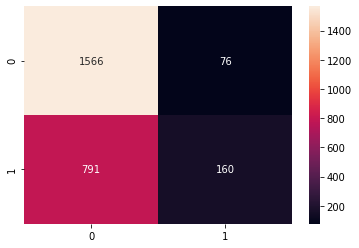

In [227]:
y_pred = logreg.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred, labels=None)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred))

In [228]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [229]:
train_score = logreg.score(X_train_scaled, y_train)
test_score = logreg.score(X_test_scaled, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.6603991900491756
Test score:  0.6637099884303895


Accuracy:  0.6637099884303895
              precision    recall  f1-score   support

           0       0.67      0.93      0.78      1642
           1       0.63      0.20      0.30       951

    accuracy                           0.66      2593
   macro avg       0.65      0.57      0.54      2593
weighted avg       0.65      0.66      0.60      2593



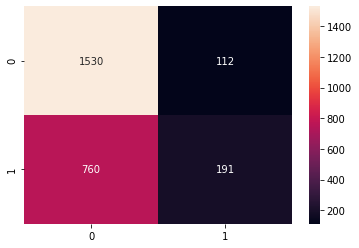

In [230]:
y_pred = logreg.predict(X_test_scaled)

ac = accuracy_score(y_test, y_pred)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred, labels=None)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred))

# Support Vector Machine

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

svc_model = SVC(kernel='linear', probability=True)

svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

0.6644812957963748

In [249]:
train_score = svc_model.score(X_train_scaled, y_train)
test_score = svc_model.score(X_test_scaled, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.6626169125445955
Test score:  0.6644812957963748


Accuracy:  0.6644812957963748
              precision    recall  f1-score   support

           0       0.66      0.95      0.78      1642
           1       0.67      0.17      0.27       951

    accuracy                           0.66      2593
   macro avg       0.67      0.56      0.53      2593
weighted avg       0.67      0.66      0.59      2593



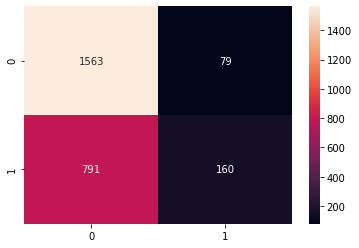

In [233]:
y_pred_svc = svc_model.predict(X_test)

ac = accuracy_score(y_test, y_pred_svc)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred_svc, labels=None)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred_svc))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

svc_model = SVC(kernel='linear', probability=True)

svc_model.fit(X_train_scaled, y_train)
svc_model.score(X_test, y_test)

# Naive Bayes

In [244]:
df.head()

,Stats Area,Total Units,Casualty,Area Speed,Position Type,Horizontal Align,Vertical Align,Sealed Road,Dry Road,Raining,Daytime,Crash Type,Unit Resp,Entity Code,Traffic Ctrls,DUI Involved,Drugs Involved,Unit No,Veh Reg State,Unit Type,Veh_Age,Direction Of Travel,Sex,Age,Lic State,Licence Type,Towing,Unit Movement,Number Occupants,Rollover,Fire
REPORT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-1-8/07/2020,2,2,0,2,1,1,1,1,1,0,1,1,1,1,3,0.0,0.0,1,0.366998,1,2.0,0.373232,0,85.0,0.36522,8,0.0,0.385584,1.0,0.0,0.0
2019-2-8/07/2020,2,2,0,3,4,1,1,1,1,0,0,1,2,1,1,0.0,0.0,1,0.366998,1,1.0,0.386047,1,21.0,0.36522,7,0.0,0.377448,4.0,0.0,0.0
2019-3-8/07/2020,2,2,1,2,4,1,1,1,1,0,0,3,1,1,1,0.0,0.0,1,0.366998,1,1.0,0.349967,0,37.0,0.36522,8,0.0,0.377448,1.0,0.0,0.0
2019-4-8/07/2020,2,2,1,2,3,2,1,1,1,0,0,2,1,1,1,0.0,0.0,1,0.366998,4,1.0,0.372093,1,21.0,0.36522,3,0.0,0.377448,1.0,0.0,0.0
2019-5-8/07/2020,2,2,0,3,4,1,2,1,1,0,0,3,2,3,1,0.0,0.0,1,0.366998,1,1.0,0.369607,1,31.0,0.36522,8,0.0,0.377448,1.0,0.0,0.0


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

modelNB = GaussianNB()

modelNB.fit(X_train, y_train)

train_score = modelNB.score(X_train, y_train)
test_score = modelNB.score(X_test, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.649889113875229
Test score:  0.6556112610875434


Accuracy:  0.6556112610875434
              precision    recall  f1-score   support

           0       0.67      0.89      0.77      1642
           1       0.57      0.25      0.35       951

    accuracy                           0.66      2593
   macro avg       0.62      0.57      0.56      2593
weighted avg       0.63      0.66      0.61      2593



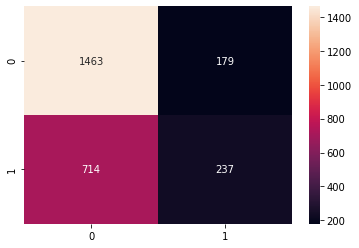

In [235]:
y_predNB = modelNB.predict(X_test)

ac = accuracy_score(y_test, y_predNB)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_predNB)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predNB))

In [236]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

modelNB = GaussianNB()

modelNB.fit(X_train_scaled, y_train)

train_score = modelNB.score(X_train_scaled, y_train)
test_score = modelNB.score(X_test_scaled, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.649889113875229
Test score:  0.6556112610875434


Accuracy:  0.6556112610875434
              precision    recall  f1-score   support

           0       0.67      0.89      0.77      1642
           1       0.57      0.25      0.35       951

    accuracy                           0.66      2593
   macro avg       0.62      0.57      0.56      2593
weighted avg       0.63      0.66      0.61      2593



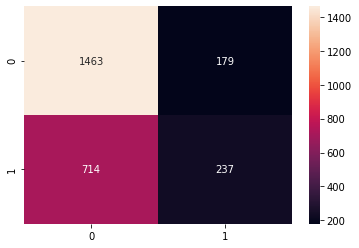

In [238]:
y_predNB = modelNB.predict(X_test_scaled)

ac = accuracy_score(y_test, y_predNB)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_predNB)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predNB))

In [263]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
lr_gs = GridSearchCV(estimator = LogisticRegression(), param_grid = lr_params, cv=5, verbose=1, n_jobs=-1)
lr_gs.fit(X, y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.66422473        nan 0.66437899        nan 0.66399319]
  warnings.warn(
C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [264]:
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 10, 'penalty': 'l2'}
0.6643789904443588


In [267]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [ ]:
svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1, n_jobs=-1)
svc_gs.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)


In [239]:
from sklearn.metrics import roc_curve, auc

In [240]:
Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['class_0_pp','class_C_pp'])
Y_pp.head(10)

,class_0_pp,class_C_pp
0,0.215324,0.784676
1,0.721622,0.278378
2,0.642691,0.357309
3,0.444023,0.555977
4,0.709728,0.290272
5,0.566359,0.433641
6,0.575145,0.424855
7,0.675604,0.324396
8,0.663517,0.336483
9,0.665102,0.334898


In [241]:
Y_svc = pd.DataFrame(svc_model.predict_proba(X_test), columns=['class_0_pp','class_C_pp'])
Y_svc.head(10)

,class_0_pp,class_C_pp
0,0.339747,0.660253
1,0.658880,0.341120
2,0.655831,0.344169
3,0.353200,0.646800
4,0.657937,0.342063
5,0.657049,0.342951
6,0.656837,0.343163
7,0.658201,0.341799
8,0.658115,0.341885
9,0.658118,0.341882


In [242]:
Y_NB = pd.DataFrame(modelNB.predict_proba(X_test), columns=['class_0_pp','class_C_pp'])
Y_NB.head(10)

,class_0_pp,class_C_pp
0,7.980908e-61,1.000000
1,5.130742e-34,1.000000
2,1.062333e-04,0.999894
3,1.535072e-54,1.000000
4,4.412963e-56,1.000000
5,2.973383e-17,1.000000
6,6.835964e-82,1.000000
7,6.476267e-23,1.000000
8,4.592838e-49,1.000000
9,1.371755e-68,1.000000


In [243]:
fpr, tpr, _ = roc_curve(y_test, Y_pp['class_C_pp'])
roc_auc = auc(fpr, tpr)

In [244]:
fpr_svc, tpr_svc, _ = roc_curve(y_test, Y_svc['class_C_pp'])
roc_aucsvc = auc(fpr_svc, tpr_svc)

In [245]:
fpr_NB, tpr_NB, _ = roc_curve(y_test, Y_NB['class_C_pp'])
roc_aucNB = auc(fpr_NB, tpr_NB)

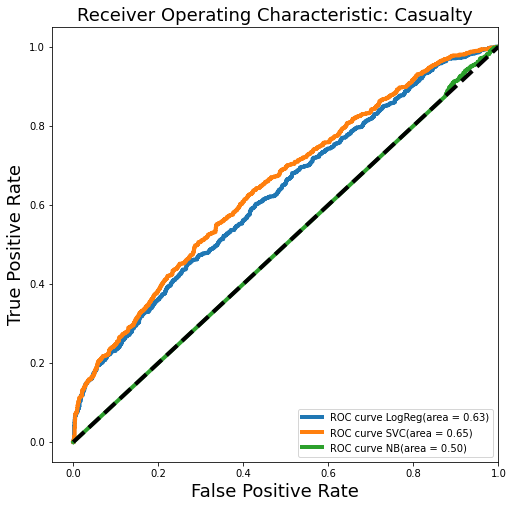

<Figure size 432x288 with 0 Axes>

In [256]:
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve LogReg(area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC(area = %0.2f)' % roc_aucsvc, linewidth=4)
plt.plot(fpr_NB, tpr_NB, label='ROC curve NB(area = %0.2f)' % roc_aucNB, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: Casualty', fontsize=18)
plt.legend(loc="lower right")
plt.show()
fig = plt.gcf()
fig.savefig('Receiver Operating Characteristic_Casualty.png')

# Stratifying models

C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score:  0.6655095940603606
Test score:  0.6621673736984188
Accuracy:  0.6621673736984188
              precision    recall  f1-score   support

           0       0.66      0.96      0.78      1638
           1       0.68      0.16      0.26       955

    accuracy                           0.66      2593
   macro avg       0.67      0.56      0.52      2593
weighted avg       0.67      0.66      0.59      2593



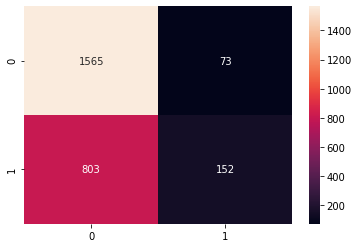

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)



train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

y_pred = logreg.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred, labels=None)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred))

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

svc_model = SVC(kernel='linear', probability=True)

svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

train_score = svc_model.score(X_train, y_train)
test_score = svc_model.score(X_test, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

y_pred_svc = svc_model.predict(X_test)

ac = accuracy_score(y_test, y_pred_svc)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred_svc, labels=None)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred_svc))

KeyboardInterrupt: 

Training score:  0.6534567544113393
Test score:  0.6409564211338218
Accuracy:  0.6409564211338218
              precision    recall  f1-score   support

           0       0.66      0.89      0.76      1638
           1       0.53      0.21      0.30       955

    accuracy                           0.64      2593
   macro avg       0.60      0.55      0.53      2593
weighted avg       0.61      0.64      0.59      2593



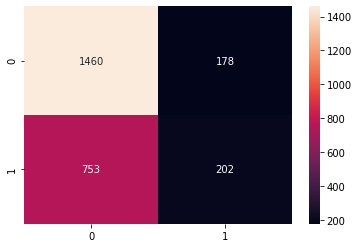

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

modelNB = GaussianNB()

modelNB.fit(X_train, y_train)

train_score = modelNB.score(X_train, y_train)
test_score = modelNB.score(X_test, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

y_predNB = modelNB.predict(X_test)

ac = accuracy_score(y_test, y_predNB)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_predNB)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predNB))

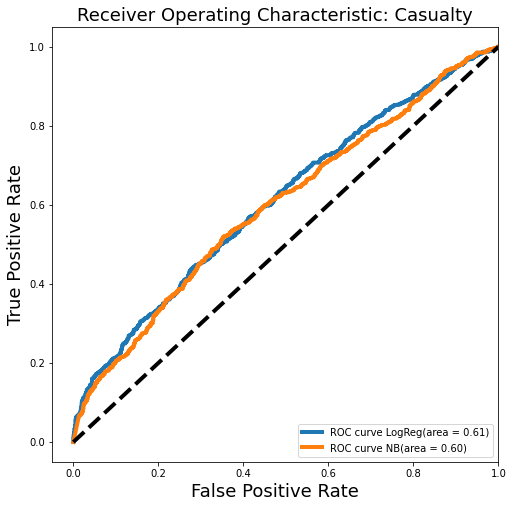

<Figure size 432x288 with 0 Axes>

In [255]:
Y_pp_strat = pd.DataFrame(logreg.predict_proba(X_test), columns=['class_0_pp','class_C_pp'])

#Y_svc_strat = pd.DataFrame(svc_model.predict_proba(X_test), columns=['class_0_pp','class_C_pp'])

Y_NB_strat = pd.DataFrame(modelNB.predict_proba(X_test), columns=['class_0_pp','class_C_pp'])

fpr_strat, tpr_strat, _ = roc_curve(y_test, Y_pp_strat['class_C_pp'])
roc_auc_strat = auc(fpr_strat, tpr_strat)

#fpr_svc_strat, tpr_svc_strat, _ = roc_curve(y_test, Y_svc_strat['class_C_pp'])
#roc_aucsvc_strat = auc(fpr_sv_stratc, tpr_svc_strat)

fpr_NB_strat, tpr_NB_strat, _ = roc_curve(y_test, Y_NB_strat['class_C_pp'])
roc_aucNB_strat = auc(fpr_NB_strat, tpr_NB_strat)

plt.figure(figsize=[8,8])
plt.plot(fpr_strat, tpr_strat, label='ROC curve LogReg(area = %0.2f)' % roc_auc_strat, linewidth=4)
#plt.plot(fpr_svc_strat, tpr_svc_strat, label='ROC curve SVC(area = %0.2f)' % roc_aucsvc_strat, linewidth=4)
plt.plot(fpr_NB_strat, tpr_NB_strat, label='ROC curve NB(area = %0.2f)' % roc_aucNB_strat, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: Casualty', fontsize=18)
plt.legend(loc="lower right")
plt.show()
#fig = plt.gcf()
#fig.savefig('Receiver Operating Characteristic_Casualty_strat.png')

# SMOTENC oversampling to even out the data balance.

In [232]:
#df.Casualty.value_counts(normalize=True)

0    0.631595
1    0.368405
Name: Casualty, dtype: float64

In [ ]:
#smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
#X_resampled, y_resampled = smote_nc.fit_resample(X, y)